In [2]:
from price import Production_Chain
from draw import *
from zipfs import *

q 1.0416666666666667
1.0208333333333335
length 10


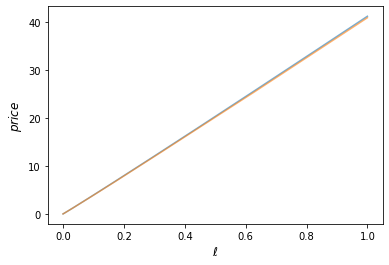

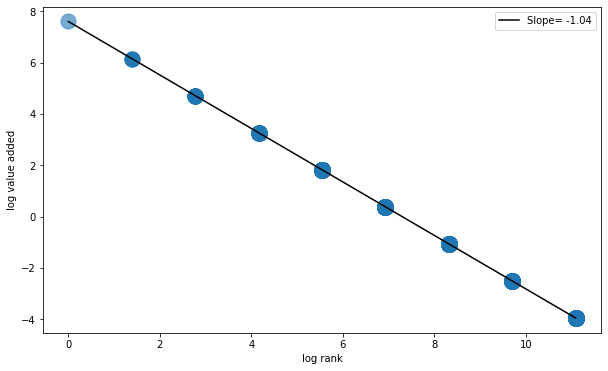

In [274]:
sigma = 0.5
a = 1/3

# theta = 0.6
# q = (1 - theta*sigma) / (theta * (1 - sigma))

def find_theta(theta):
    return  q - (1 - theta*sigma) / (theta * (1 - sigma))

q = 1 / 0.96 # empirical result
# plt.plot(np.linspace(0, 1, 100), find_theta(np.linspace(0, 2, 100)))
sol = scipy.optimize.root_scalar(find_theta, bracket=[0.01, 1], method='brentq')
theta = sol.root

print("q", q)
print(1/theta)
f = 1
pc = Production_Chain(τ=0.005, α=1, κ=4, q=q,
                      c=lambda x: (40*x**(1/theta) + f*x),
                      proportional_assembly=True)
print("length", pc.level())
ell = np.linspace(0,1,100)
p1 = pc.p_func(ell)
level1 = pc.level()
pc.plot_prices()
# draw_graph(pc, scale_factor=4000, sub_only=False, figsizes=(10,10))
zipf_with_regression(pc, sub_only=True)


## Comparative Statics

length 5


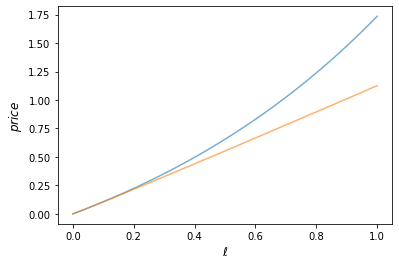

In [40]:
pc = Production_Chain(τ=0.01, α=0.01, κ=2, q=1,
                      c=lambda x: 1*(np.exp(x)-1),
                      proportional_assembly=True)
print("length", pc.level())
p1 = pc.p_func(ell)
level1 = pc.level()
pc.plot_prices()

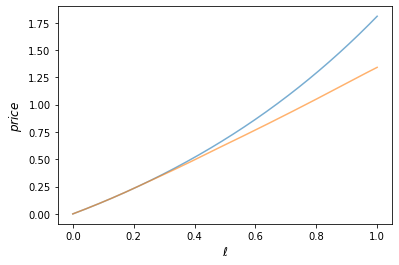

In [41]:
pc.τ = 0.05
p2 = pc.p_func(ell)
level2 = pc.level()
pc.plot_prices()

6

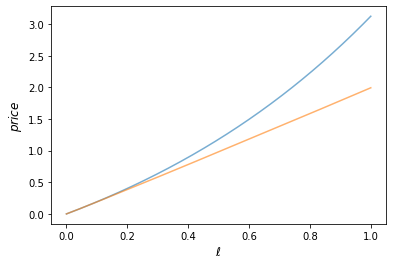

In [46]:
pc.τ = 0.01
pc.c = lambda x: 1.8*(np.exp(1*x) -1)
pc.plot_prices()
p3 = pc.p_func(ell)
level3 = pc.level()
level3

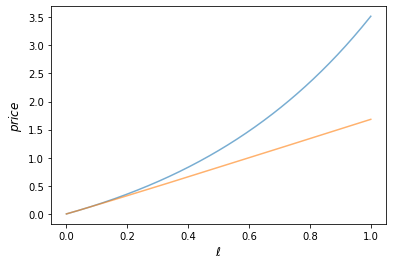

In [47]:
pc.τ = 0.01
pc.c = lambda x: np.exp(1.5*x) -1
pc.plot_prices()
p4 = pc.p_func(ell)
level4 = pc.level()

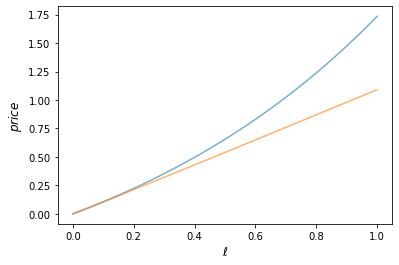

In [48]:
pc.c = lambda x: np.exp(1*x) -1
pc.κ = 3
pc.plot_prices()
level5 = pc.level()
p5 = pc.p_func(ell)

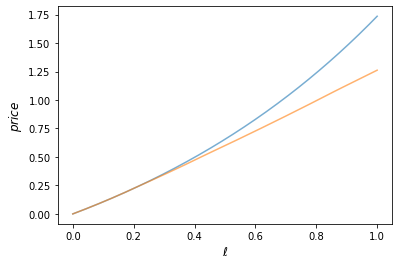

In [49]:
pc.κ = 2
pc.α = lambda x: 0.05*x**1
pc.plot_prices()
level6 = pc.level()
p6 = pc.p_func(ell)

5 4 6 6 4 4


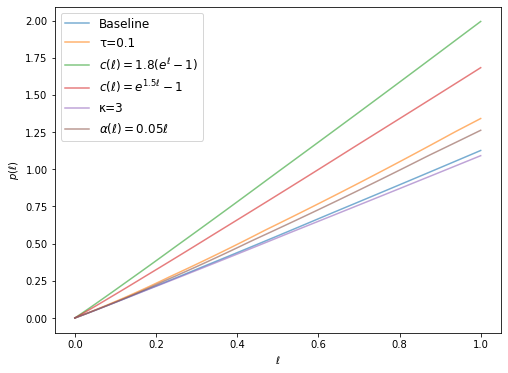

In [51]:
print(level1, level2, level3, level4, level5, level6)
ell = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ell, p1, label="Baseline", alpha=0.6)
ax.plot(ell, p2, label="τ=0.1", alpha=0.6)
ax.plot(ell, p3, label="$c(\ell)=1.8(e^{\ell}-1)$", alpha=0.6)
ax.plot(ell, p4, label="$c(\ell)=e^{1.5\ell}-1$", alpha=0.6)
ax.plot(ell, p5, label="κ=3", alpha=0.6)
ax.plot(ell, p6, label="$α(\ell)=0.05 \ell$", alpha=0.6)
plt.legend(loc="upper left", fontsize=12)
ax.set_xlabel("$\ell$")
ax.set_ylabel("$p(\ell)$")
plt.show()

4

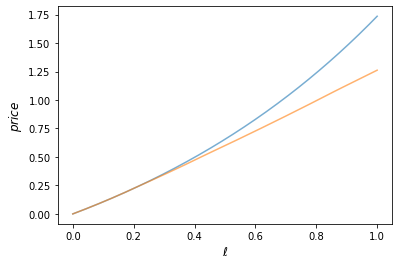

In [62]:
pc.c = lambda x:(np.exp(1*x)-1)
pc.plot_prices(label="price", cost_label="cost")
# draw_graph(pc, scale_factor=scale_factor, sub_only=False, figsizes=(10,10))
pc.level()

15

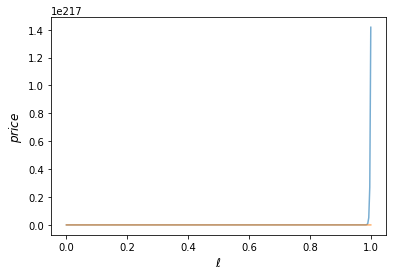

In [5]:
pc.c = lambda x:(np.exp(500*x)-1)
pc.plot_prices(label="price", cost_label="cost")
pc.level()

## Distribution

6


/home/chien/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


p(1) =  0.03419184812953996


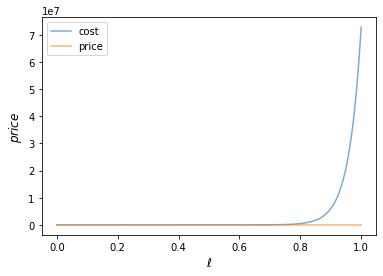

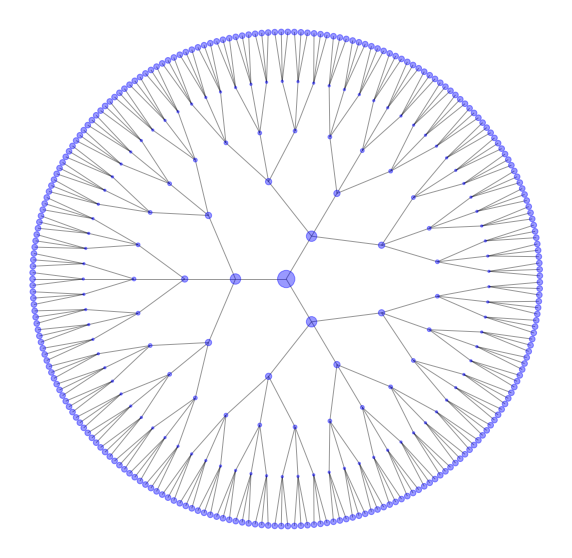

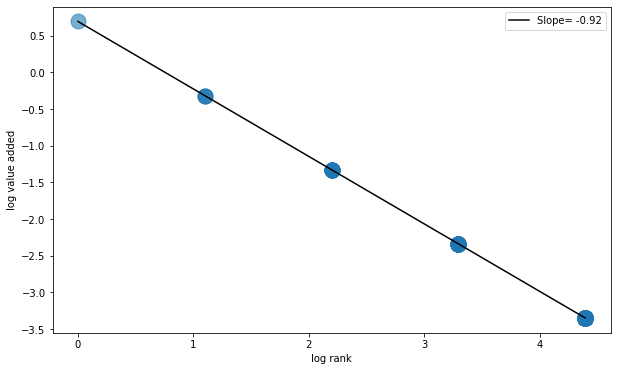

In [2]:
pc = Production_Chain(τ=0.01, α=0.001, κ=3, q=0.92,
                      c=lambda x: 0.0010*(np.exp(25*x)-1),
                      proportional_assembly=True)
pc.plot_prices(label="price", cost_label="cost")
print(pc.level())
plt.legend()
scale_factor=3e5
draw_graph(pc, scale_factor=scale_factor, sub_only=False, figsizes=(10,10))
zipf_with_regression(pc, sub_only=True)
print("p(1) = ", pc.p[-1])

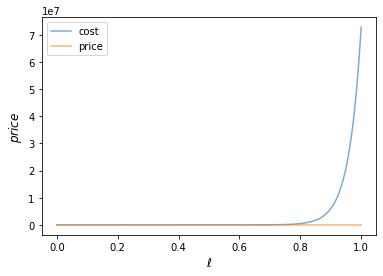

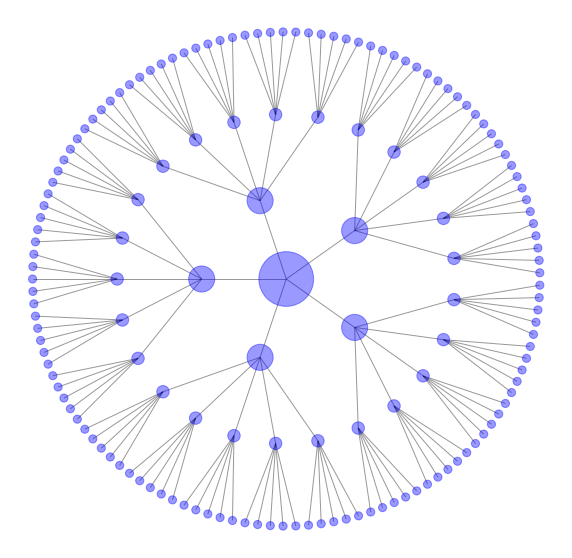

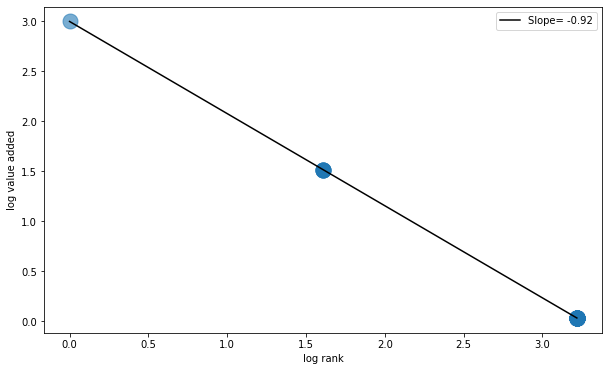

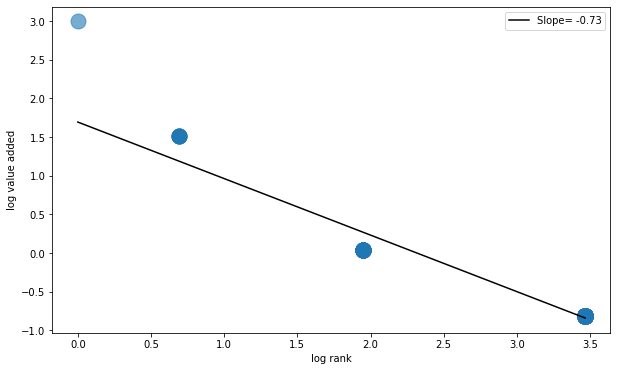

In [4]:
pc = Production_Chain(τ=0.01, α=0.01, κ=5, q=0.92,
                      c=lambda x: 0.0010*(np.exp(25*x)-1),
                      proportional_assembly=True)
pc.plot_prices(label="price", cost_label="cost")
plt.legend()
scale_factor=3e5
draw_graph(pc, scale_factor=scale_factor, sub_only=False, figsizes=(10,10))
zipf_with_regression(pc, sub_only=True)
zipf_with_regression(pc, sub_only=False)

p(1) =  35.11661215557854


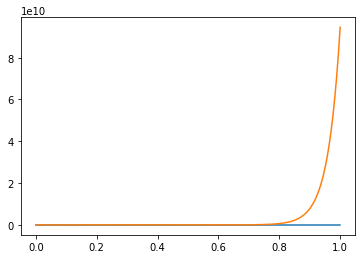

In [44]:
pc = Production_Chain(τ=0.01, α=0.01, κ=5, q=0.8,
                      c=lambda x: 1.3*(np.exp(25*x)-1),
                      proportional_assembly=True)
pc.plot_prices(label="price", cost_label="cost")
# plt.legend()
# scale_factor=1e5
# draw_graph(pc, scale_factor=scale_factor, sub_only=False, figsizes=(10,10))
# zipf_with_regression(pc, sub_only=Tru1e5e)

print("p(1) = ", pc.p[-1])